## importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Training data

In [3]:
train_data=pd.read_csv(r"C:\Users\id\Downloads\train_ctrUa4K (1).csv")

In [4]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# EXPLORATORY DATA  ANALYSIS

In [5]:
train_data.shape

(614, 13)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

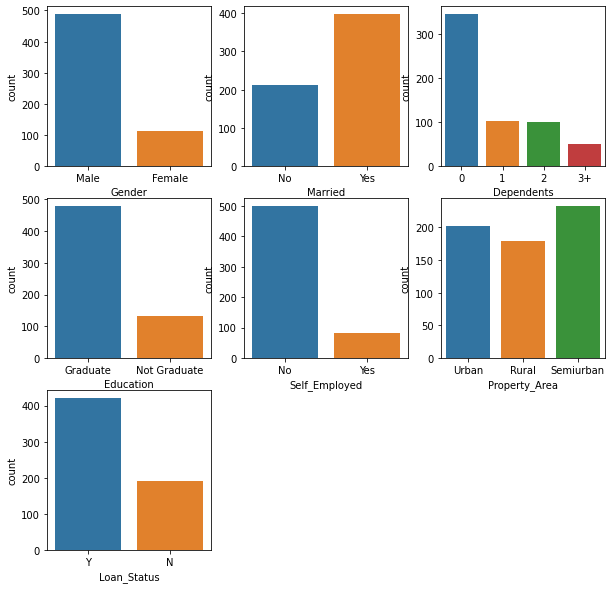

In [11]:
categorical_columns = ['Gender', 'Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
plt.figure(figsize=(10,10))
for i in enumerate(categorical_columns):
    plt.subplot(3,3,i[0]+1)
    sns.countplot(data=train_data,x=i[1])

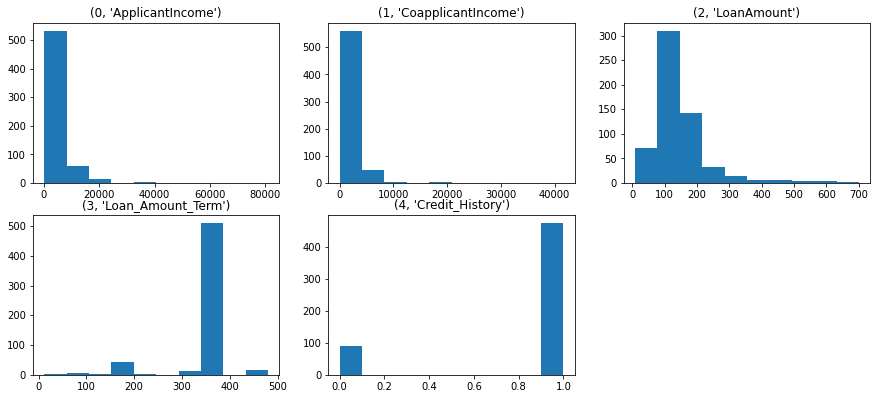

In [12]:
num_cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
plt.figure(figsize=(15,10))
for i in enumerate(num_cols):
    plt.subplot(3,3,i[0]+1)
    plt.title(i)
    plt.hist(train_data[i[1]])

In [13]:
train_data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

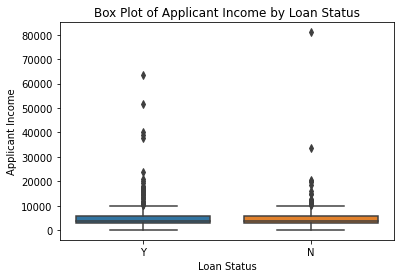

In [14]:
sns.boxplot( x='Loan_Status',y='ApplicantIncome', data=train_data)
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.title('Box Plot of Applicant Income by Loan Status')
plt.show()

In [15]:
loan_status_counts = train_data['Loan_Status'].value_counts()

loan_status_percentage = loan_status_counts / len(train_data) * 100
print("Loan Approval Status:")
print(loan_status_percentage)

Loan Approval Status:
Loan_Status
Y    68.729642
N    31.270358
Name: count, dtype: float64


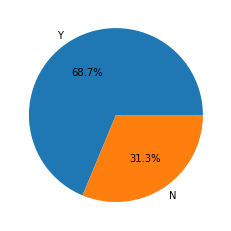

In [16]:
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%');

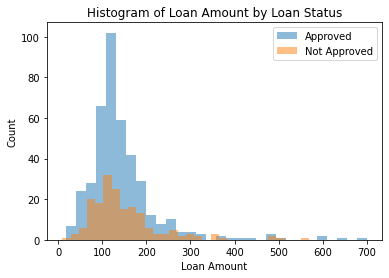

In [17]:
plt.hist(train_data[train_data['Loan_Status'] == 'Y']['LoanAmount'], bins=30, alpha=0.5, label='Approved')
plt.hist(train_data[train_data['Loan_Status'] == 'N']['LoanAmount'], bins=30, alpha=0.5, label='Not Approved')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Histogram of Loan Amount by Loan Status')
plt.legend()
plt.show()


# PREPROCESSING DATA

In [18]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [19]:
train_data.loc[train_data['Dependents'] == '3+', 'Dependents'] = 3


In [20]:
train_data=train_data.drop('Loan_ID',axis=1)

In [21]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
train_data.shape

(614, 12)

In [23]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# HANDLING MISSING VALUES

In [24]:
train_data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
for i in ['Gender','Married','Dependents','Self_Employed']:
    train_data[i]=train_data[i].fillna(train_data[i].mode)

In [26]:
for i in ['LoanAmount','Loan_Amount_Term','Credit_History']:
    train_data[i]=train_data[i].fillna(train_data[i].median())

In [27]:
train_data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [28]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# ENCODING

# Label Encoding

In [29]:
train_data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for col in train_data.columns:
    if train_data[col].dtype=='object':
        train_data[col]=label_encoder.fit_transform(train_data[col].astype(str))


In [31]:
train_data.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [32]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2,1,0,0,1,5849,0.0,128.0,360.0,1.0,2,1
1,2,2,1,0,1,4583,1508.0,128.0,360.0,1.0,0,0
2,2,2,0,0,2,3000,0.0,66.0,360.0,1.0,2,1
3,2,2,0,1,1,2583,2358.0,120.0,360.0,1.0,2,1
4,2,1,0,0,1,6000,0.0,141.0,360.0,1.0,2,1


# HEATMAP

<AxesSubplot:>

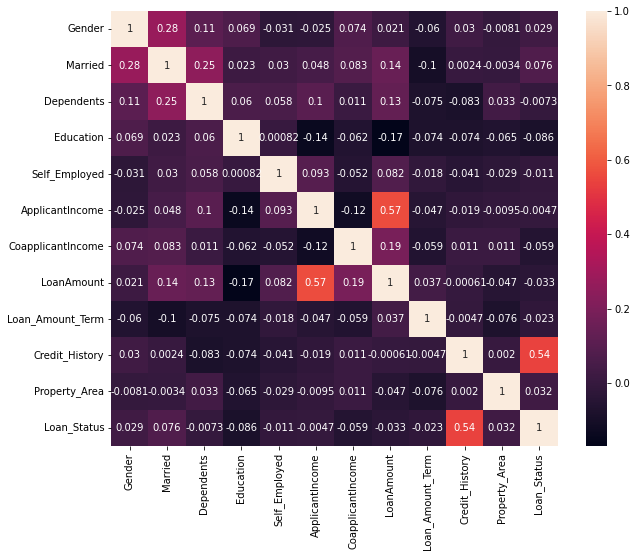

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr(),annot=True)

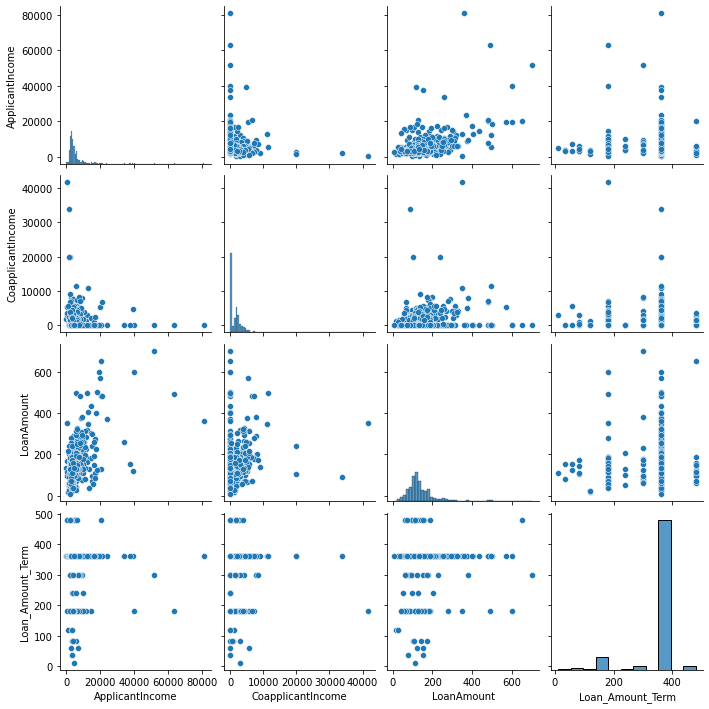

In [34]:
slice_data=train_data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
sns.pairplot(slice_data)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

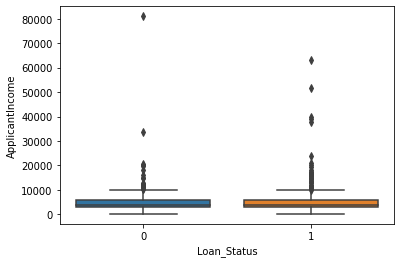

In [35]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=train_data)

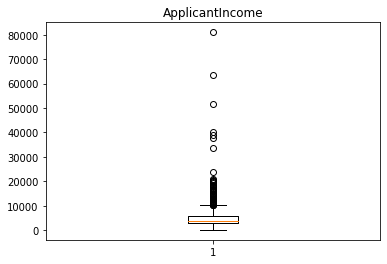

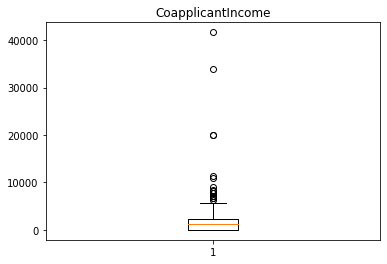

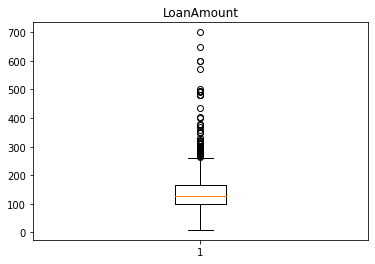

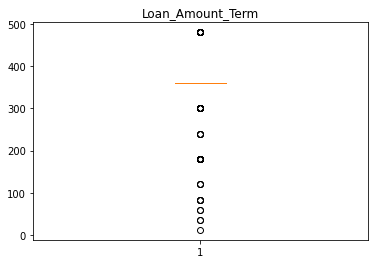

In [36]:
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']:
  plt.figure()
  plt.boxplot(train_data[i])
  plt.title(i)

# SPLITTING DATA INTO DEPENDENT AND INDEPENDENT COLUMNS


In [37]:
x=train_data.drop('Loan_Status',axis=1)
y=train_data['Loan_Status']

In [38]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,2,1,0,0,1,5849,0.0,128.0,360.0,1.0,2
1,2,2,1,0,1,4583,1508.0,128.0,360.0,1.0,0
2,2,2,0,0,2,3000,0.0,66.0,360.0,1.0,2
3,2,2,0,1,1,2583,2358.0,120.0,360.0,1.0,2
4,2,1,0,0,1,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,1,1,0,0,1,2900,0.0,71.0,360.0,1.0,0
610,2,2,3,0,1,4106,0.0,40.0,180.0,1.0,0
611,2,2,1,0,1,8072,240.0,253.0,360.0,1.0,2
612,2,2,2,0,1,7583,0.0,187.0,360.0,1.0,2


In [39]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

## Scaling

# Standard Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [41]:
train_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = sc.fit_transform(train_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])


In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

 ## LOGISTIC REGRESSION

In [43]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

C:\Users\id\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print('Confusion matrix of logistic regression is',cm)
print('Accuracy of Logistic Regression is ',accuracy_score(y_test,y_pred))

Confusion matrix of logistic regression is [[18 25]
 [ 3 77]]
Accuracy of Logistic Regression is  0.7723577235772358


<function matplotlib.pyplot.show(close=None, block=None)>

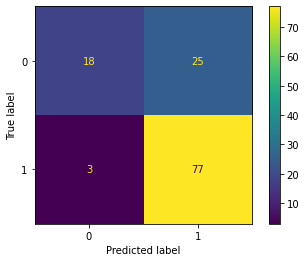

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show

## KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
metric_k=[]
neighbors=np.arange(3,10)

In [49]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)

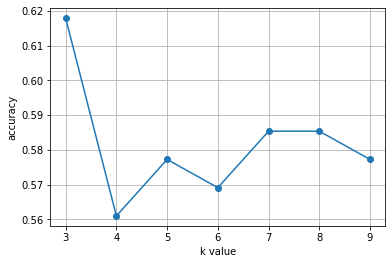

In [50]:
plt.plot(neighbors,metric_k,'o-') 
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [51]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)

In [52]:
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [54]:
c_matrix=confusion_matrix(y_test,y_pred)
print('Confusion matrix of kNN classification  is',c_matrix)

Confusion matrix of kNN classification  is [[ 9 34]
 [13 67]]


In [55]:
print('Accuracy of kNN classification is',accuracy_score(y_test,y_pred))
print('Precision of kNN classification is',precision_score(y_test,y_pred,average='macro'))

Accuracy of kNN classification is 0.6178861788617886
Precision of kNN classification is 0.5362286228622862


<function matplotlib.pyplot.show(close=None, block=None)>

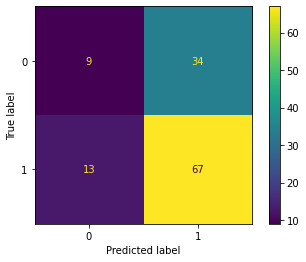

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(c_matrix)
disp.plot()
plt.show

## DECISION TREE CLASSIFIER

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)

In [58]:
y_pred

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [59]:
print('Accuracy of Decision tree classifier is :',accuracy_score(y_test,y_pred))

Accuracy of Decision tree classifier is : 0.6829268292682927


In [60]:
print(confusion_matrix(y_test,y_pred))

[[23 20]
 [19 61]]


<function matplotlib.pyplot.show(close=None, block=None)>

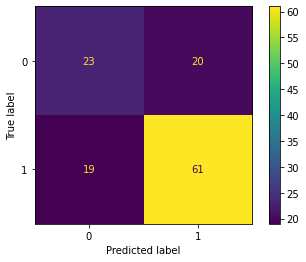

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
disp.plot()
plt.show

## RANDOM FOREST

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [63]:
y_pred=rf_clf.predict(x_test)

In [64]:
print(confusion_matrix(y_test,y_pred))

[[18 25]
 [ 3 77]]


In [65]:
##hyper parameter tuning
rf_clf=RandomForestClassifier(n_estimators=20,max_depth=3,criterion='entropy',min_samples_split=2)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=20)

In [66]:
y_pred=rf_clf.predict(x_test)
print('Accuracy is :',accuracy_score(y_test,y_pred))

Accuracy is : 0.7886178861788617


In [67]:
print(confusion_matrix(y_test,y_pred))

[[18 25]
 [ 1 79]]


<function matplotlib.pyplot.show(close=None, block=None)>

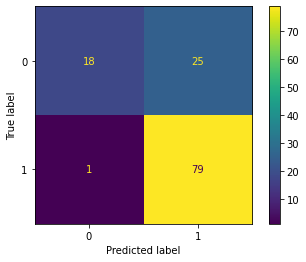

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
disp.plot()
plt.show

## TESTING DATA

In [70]:
test_data=pd.read_csv(r"C:\Users\id\Downloads\test_lAUu6dG (1).csv")

In [71]:
test_data.loc[test_data['Dependents'] == '3+', 'Dependents'] = 3


In [72]:
test_data.shape

(367, 12)

In [73]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [74]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [75]:
test_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

# plotting Test data

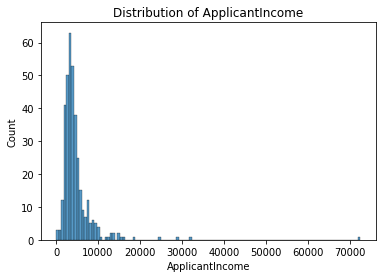

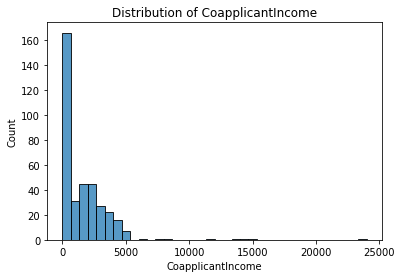

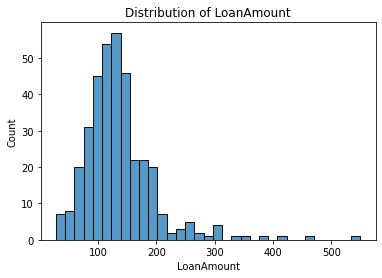

In [76]:
num_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for feature in num_features:
    plt.figure()
    sns.histplot(test_data[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()

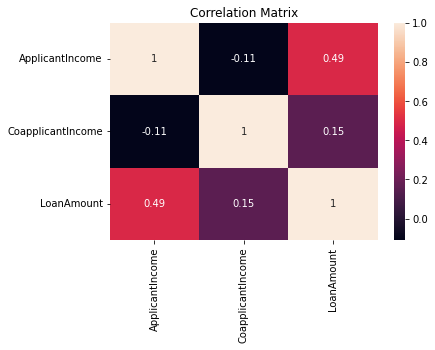

In [77]:
plt.figure()
sns.heatmap(test_data[num_features].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()


# Pre Processing of testing data

In [78]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [79]:
object_col=['Gender','Dependents','Self_Employed']
for j in object_col:
    test_data[j]=test_data[j].fillna(test_data[j].mode()[0])

In [80]:
float_col=['LoanAmount','Loan_Amount_Term','Credit_History']
for i in float_col:
    test_data[i]=test_data[i].fillna(test_data[i].median())

In [81]:
test_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [82]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [83]:
# Encoding

In [84]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [85]:
lst=['Loan_ID','Gender','Married','Education','Self_Employed','Property_Area']
for i in lst:
    test_data[i]=lab_enc.fit_transform(test_data[i])

In [86]:
test_data.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
dtype: object

In [87]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [88]:
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# STANDARD SCALING

In [89]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [90]:
test_data= scaler.fit_transform(test_data)

In [91]:
test_data

array([[-1.72733774,  0.48547939,  0.75835829, ...,  0.26602207,
         0.4376739 ,  1.11876379],
       [-1.71789873,  0.48547939,  0.75835829, ...,  0.26602207,
         0.4376739 ,  1.11876379],
       [-1.70845973,  0.48547939,  0.75835829, ...,  0.26602207,
         0.4376739 ,  1.11876379],
       ...,
       [ 1.70845973,  0.48547939, -1.31863792, ...,  0.26602207,
         0.4376739 , -0.09598861],
       [ 1.71789873,  0.48547939,  0.75835829, ...,  0.26602207,
         0.4376739 , -1.31074101],
       [ 1.72733774,  0.48547939, -1.31863792, ..., -2.52163936,
         0.4376739 , -1.31074101]])

In [92]:
test_data.shape

(367, 12)

In [93]:
test_data=pd.DataFrame(test_data,columns=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area'])

## MODELLING

In [94]:
test_data=test_data.drop('Loan_ID',axis=1)

In [95]:
predictions=logit_model.predict(test_data)

In [96]:
predictions

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

<AxesSubplot:>

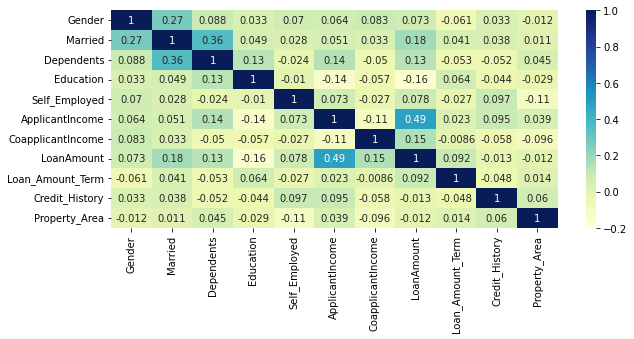

In [97]:
## correlation
corrmatrix=test_data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,annot=True,vmin=-0.2,vmax=1,cmap='YlGnBu')

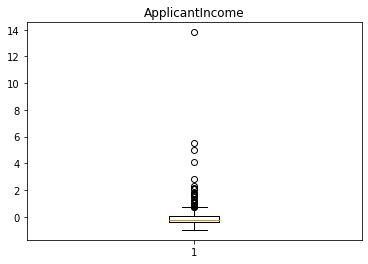

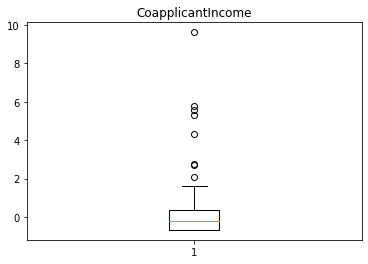

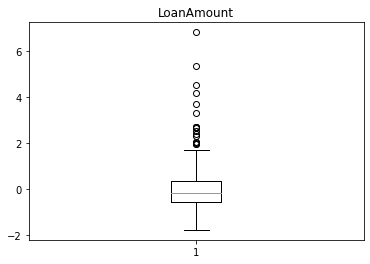

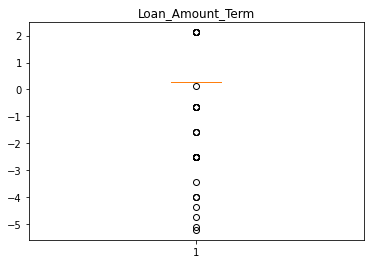

In [98]:
#boxplot
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']:
    plt.figure()
    plt.boxplot(test_data[i])
    plt.title(i)

In [99]:
x_test=test_data
predictions =logit_model.predict(x_test)

In [100]:
print(predictions)

[1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [101]:
x_test.shape

(367, 11)

In [102]:
predictions.shape

(367,)

In [103]:
test_data=pd.read_csv(r"C:\Users\id\Downloads\test_lAUu6dG (1).csv")


In [104]:
submission = pd.DataFrame({'Loan_ID': test_data['Loan_ID'], 'Loan_Status': predictions})

In [105]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [107]:
submission.to_csv(r'C:\Users\id\Desktop\mariya thomas\submission.csv',index=False)

In [108]:
print(submission)

      Loan_ID Loan_Status
0    LP001015           Y
1    LP001022           Y
2    LP001031           Y
3    LP001035           Y
4    LP001051           Y
..        ...         ...
362  LP002971           Y
363  LP002975           Y
364  LP002980           Y
365  LP002986           Y
366  LP002989           Y

[367 rows x 2 columns]
